In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

data = pd.read_csv('Tele.csv')


In [47]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,925,1


In [48]:
data.shape

(7043, 19)

In [49]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'TotalCharges', 'Churn'],
      dtype='object')

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

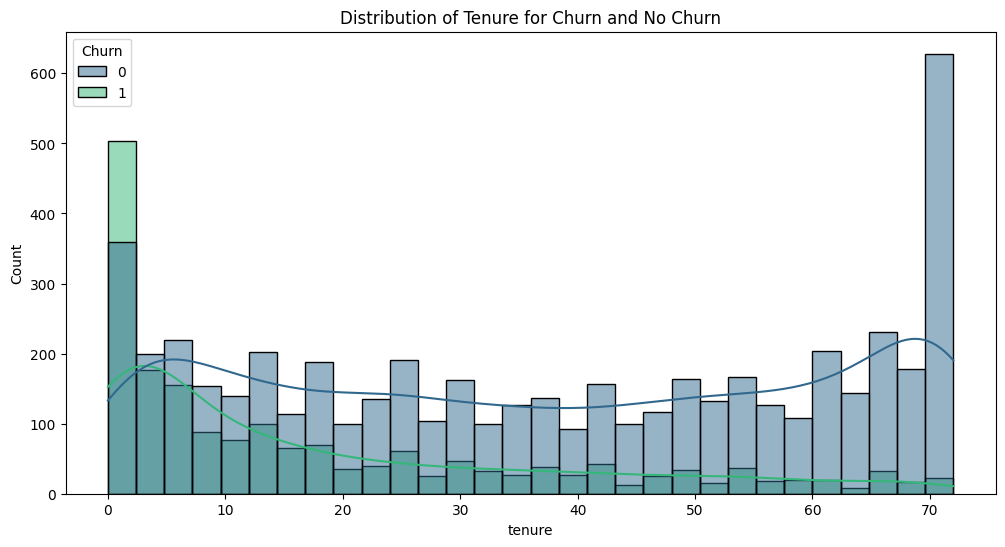

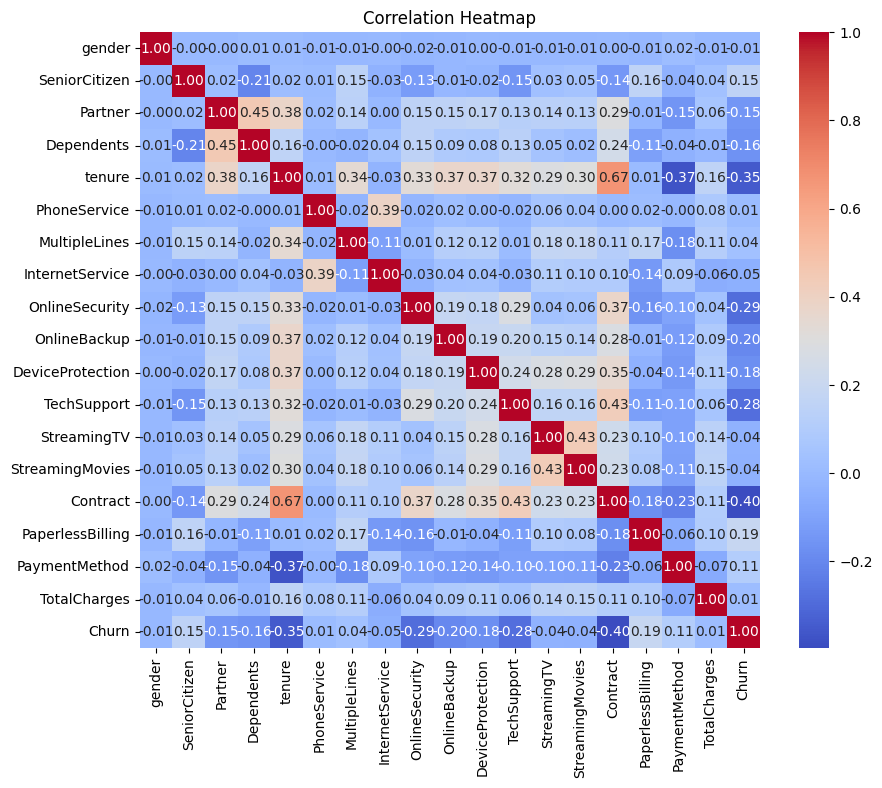

In [58]:
# Visualizing the distribution of 'tenure' for Churn and No Churn
plt.figure(figsize=(12, 6))
sns.histplot(data, x='tenure', hue='Churn', kde=True, bins=30, palette='viridis')
plt.title('Distribution of Tenure for Churn and No Churn')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [32]:
data = data.drop(columns=['customerID', 'MonthlyCharges'], axis=1)


In [33]:
label_encoder = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])


In [34]:
X = data.drop(columns=['Churn'])
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import numpy as np

class HiddenMarkovModel:
    def __init__(self, num_states):
        self.num_states = num_states
        self.transition_matrix = None
        self.emission_matrix = None

    def initialize_parameters(self, num_features):
        self.transition_matrix = np.random.rand(self.num_states, self.num_states)
        self.transition_matrix /= np.sum(self.transition_matrix, axis=1)[:, np.newaxis]
        self.emission_matrix = np.random.rand(self.num_states, num_features)
        self.emission_matrix /= np.sum(self.emission_matrix, axis=1)[:, np.newaxis]

    #this calculates the probability of being in a specific hidden state at given time , given observations up to that time 
    def forward_algorithm(self, observations):
        num_obs = len(observations)
        alpha = np.zeros((num_obs, self.num_states))

        alpha[0, :] = 1 / self.num_states * self.emission_matrix[:, observations[0]]

        for t in range(1, num_obs):
            for j in range(self.num_states):
                alpha[t, j] = np.sum(alpha[t - 1, i] * self.transition_matrix[i, j] * self.emission_matrix[j, observations[t]] for i in range(self.num_states))

        return alpha

    # this is used to calc the probability of observing the remaining emissions from a specific hidden state 
    def backward_algorithm(self, observations):
        num_obs = len(observations)
        beta = np.zeros((num_obs, self.num_states))

        beta[num_obs - 1, :] = 1

        for t in range(num_obs - 2, -1, -1):
            for i in range(self.num_states):
                beta[t, i] = np.sum(beta[t + 1, j] * self.transition_matrix[i, j] * self.emission_matrix[j, observations[t + 1]] for j in range(self.num_states))

        return beta

    def viterbi_algorithm(self, observations):
        num_obs = len(observations)
        delta = np.zeros((num_obs, self.num_states))
        psi = np.zeros((num_obs, self.num_states), dtype=int)

        delta[0, :] = 1 / self.num_states * self.emission_matrix[:, observations[0]]

        for t in range(1, num_obs):
            for j in range(self.num_states):
                probabilities = delta[t - 1, :] * self.transition_matrix[:, j] * self.emission_matrix[j, observations[t]]
                psi[t, j] = np.argmax(probabilities)
                delta[t, j] = np.max(probabilities)

        path = np.zeros(num_obs, dtype=int)
        path[-1] = np.argmax(delta[-1, :])

        for t in range(num_obs - 2, -1, -1):
            path[t] = psi[t + 1, path[t + 1]]

        return path

    def train(self, observations, max_iterations=100):
        num_features = len(set(observations))
        self.initialize_parameters(num_features)

        for iteration in range(max_iterations):
            alpha = self.forward_algorithm(observations)
            beta = self.backward_algorithm(observations)
            self.update_model(observations, alpha, beta)

    def predict(self, observations):
        alpha = self.forward_algorithm(observations)
        return np.argmax(alpha, axis=1)

    def predict_viterbi(self, observations):
        path = self.viterbi_algorithm(observations)
        return path


In [36]:
num_states = 2
hmm_model = HiddenMarkovModel(num_states)
hmm_model.train(X_train['tenure'].values)

y_pred = hmm_model.predict(X_test['tenure'].values)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# print(f"Accuracy: {accuracy}")



/var/folders/g8/40cfrzs132l1krcw1vkvjhcw0000gn/T/ipykernel_99413/557345555.py:25: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  alpha[t, j] = np.sum(alpha[t - 1, i] * self.transition_matrix[i, j] * self.emission_matrix[j, observations[t]] for i in range(self.num_states))
/var/folders/g8/40cfrzs132l1krcw1vkvjhcw0000gn/T/ipykernel_99413/557345555.py:41: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  beta[t, i] = np.sum(beta[t + 1, j] * self.transition_matrix[i, j] * self.emission_matrix[j, observations[t + 1]] for j in range(self.num_states))
/var/folders/g8/40cfrzs132l1krcw1vkvjhcw0000gn/T/ipykernel_99413/557345555.py:53: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different r

In [37]:
X = data.drop(columns=['Churn'])
y = data['Churn']
from hmmlearn import hmm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_states = 2  # Churn (1) or No Churn (0)
model = hmm.GaussianHMM(n_components=num_states, covariance_type="full", n_iter=100)
model.fit(X_train[['tenure']])

y_pred = model.predict(X_test[['tenure']])
conf_matrix = confusion_matrix(y_test, y_pred)


print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[785 251]
 [152 221]]


In [60]:
from hmmlearn import hmm


X = data[['tenure', 'SeniorCitizen',  'TotalCharges']]
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# here we are defining Number of states for HMM
num_states = 2

model = hmm.GaussianHMM(n_components=num_states, covariance_type="full", n_iter=100)
model.fit(X_train)


y_pred = model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy}")


Confusion Matrix:
[[901 135]
 [272 101]]
Accuracy: 0.7111426543647977


In [68]:
selected_features = ['tenure', 'SeniorCitizen', 'TotalCharges']
X_selected = data[selected_features]

num_states = 4

model_selected = hmm.GaussianHMM(n_components=num_states, covariance_type="diag", n_iter=100)
model_selected.fit(X_selected)

#  We Input new values for prediction here 
new_values = pd.DataFrame({'tenure': [15], 'SeniorCitizen': [0], 'TotalCharges': [500]})


predicted_churn_state = model_selected.predict(new_values)
predicted_churn_status = 'Churn' if predicted_churn_state[-1] == 1 else 'No Churn'

print(f"Predicted Churn Status: {predicted_churn_status}")


Predicted Churn Status: No Churn


In [81]:
import numpy as np


selected_features = ['tenure', 'SeniorCitizen', 'TotalCharges']
X_selected = data[selected_features]


num_states = 4


model_selected = hmm.GaussianHMM(n_components=num_states, covariance_type="diag", n_iter=100)
model_selected.fit(X_selected)

new_values = pd.DataFrame({'tenure': [5], 'SeniorCitizen': [0], 'TotalCharges': [50]})
predicted_churn_state = model_selected.predict(new_values)

predicted_churn_status = 'Churn' if predicted_churn_state[-1] % 2 == 1 else 'No Churn'

print(f"Predicted Churn Status: {predicted_churn_status}")


Predicted Churn Status: Churn


In [83]:
selected_features = ['tenure', 'SeniorCitizen', 'TotalCharges']
X_selected = data[selected_features]


num_states = 4
model_selected = hmm.GaussianHMM(n_components=num_states, covariance_type="diag", n_iter=100)
model_selected.fit(X_selected)


new_values = pd.DataFrame({'tenure': [9], 'SeniorCitizen': [1], 'TotalCharges': [5000]})


predicted_churn_state = model_selected.predict(new_values)
predicted_churn_status = 'Churn' if predicted_churn_state[-1] == 1 else 'No Churn'

print(f"Predicted Churn Status: {predicted_churn_status}")


Predicted Churn Status: No Churn


In [111]:
hmm_model = hmm.GaussianHMM(n_components=num_states)
hmm_model.fit(X_train[['tenure']])

# Function to predict churn for specific values
def predict_churn_for_values(tenure):
    input_data = pd.DataFrame({'tenure': [tenure]})

    churn_prediction = hmm_model.predict(input_data)

    return churn_prediction[0]

tenure_input = float(input("Enter tenure: "))

prediction = predict_churn_for_values(tenure_input)


if prediction == 1:
    print("The customer is predicted to churn.")
else:
    print("The customer is predicted not to churn.")

The customer is predicted to churn.
